# Intelligence analysis

memes dataset

In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('data/memes.csv', index_col=0)
df.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."


In [3]:
df.shape

(4206, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4206 entries, 0 to 4205
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4206 non-null   object
 1   status        4206 non-null   object
 2   type          1786 non-null   object
 3   origin_year   4206 non-null   object
 4   origin_place  4203 non-null   object
 5   date_added    4206 non-null   object
 6   views         4206 non-null   int64 
 7   videos        4206 non-null   int64 
 8   photos        4206 non-null   int64 
 9   comments      4206 non-null   int64 
 10  tags          4205 non-null   object
 11  about         3798 non-null   object
 12  origin        2524 non-null   object
 13  other_text    3508 non-null   object
dtypes: int64(4), object(10)
memory usage: 492.9+ KB


In [5]:
df.describe()

,views,videos,photos,comments
count,4.206000e+03,4206.000000,4206.000000,4206.000000
mean,7.226205e+04,5.820257,51.473371,39.009510
std,2.470807e+05,19.757376,497.391877,97.193556
min,9.700000e+01,-1.000000,0.000000,0.000000
25%,3.874750e+03,0.000000,1.000000,4.000000
50%,1.574300e+04,0.000000,10.000000,13.000000
75%,5.336375e+04,4.000000,26.000000,35.750000
max,9.095857e+06,469.000000,28911.000000,1713.000000


In [6]:
df.describe(include='object')

,name,status,type,origin_year,origin_place,date_added,tags,about,origin,other_text
count,4206,4206,1786,4206,4203,4206,4205,3798,2524,3508
unique,4205,3,98,117,1884,4204,4001,3648,2501,3503
top,NO REFUNDS,Submission,Exploitable,Unknown,Unknown,2016-10-16T01:19:03-04:00,none...,NOTE: This Entry was related to the 2013 April...,\n\n\n,Spread Various Examples Templates Search Inter...
freq,2,2482,152,349,535,2,168,58,11,3


In [7]:
df[df['views'] == df['views'].max()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
3958,Me Gusta,Confirmed,Character,2010,4chan,2018-09-27T16:03:51-04:00,9095857,21,518,142,"4chan, rageguy, spinoff, 4 panel comic, me gus...",Me Gusta is a rage comic face that is typicall...,"The colloquial Spanish phrase ""Me Gusta"" was f...","Spread In December 2010, the single topic blog..."


In [8]:
df[df['views'] == df['views'].min()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
1324,Warren Deacon,Deadpool,NaN,2017,Mine,2017-02-10T00:26:36-05:00,97,0,0,0,"politics, trump, nuclear, drama, movie, poster",Fictional movie poster,NaN,NaN


In [9]:
df[(df['views'] >= df['views'].quantile(0.25)) & (df['views'] <= df['views'].quantile(0.75))].shape

(2102, 14)

In [10]:
df['Time'] = pd.to_datetime(df.date_added)

/tmp/ipykernel_28307/3007857779.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Time'] = pd.to_datetime(df.date_added)


In [12]:
t = df.Time.loc[0]
t.timestamp()

1571904303.0

In [19]:
df.Time.loc[1].year, df.Time.loc[1].month, df.Time.loc[1].day, df.Time.loc[1].hour

(2019, 10, 23, 12)

In [21]:
df.Time.loc[0].weekday()

3

In [23]:
df['Year'] = df.Time.apply(lambda x: x.year)
df['Month'] = df.Time.apply(lambda x: x.month)
df['Day'] = df.Time.apply(lambda x: x.day)
df['Hour'] = df.Time.apply(lambda x: x.hour)
df['Weekday'] = df.Time.apply(lambda x: x.weekday())

df.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text,Time,Year,Month,Day,Hour,Weekday
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...,2019-10-24 04:05:03-04:00,2019,10,24,4,3
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...,2019-10-23 12:13:13-04:00,2019,10,23,12,2
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T...",2019-10-23 11:56:19-04:00,2019,10,23,11,2
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload...",2019-10-23 10:32:04-04:00,2019,10,23,10,2
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and...",2019-10-25 12:42:22-04:00,2019,10,25,12,4


In [24]:
df['Days_from_creation'] = (df.Time.max() - df.Time)/np.timedelta64(1, 'D')

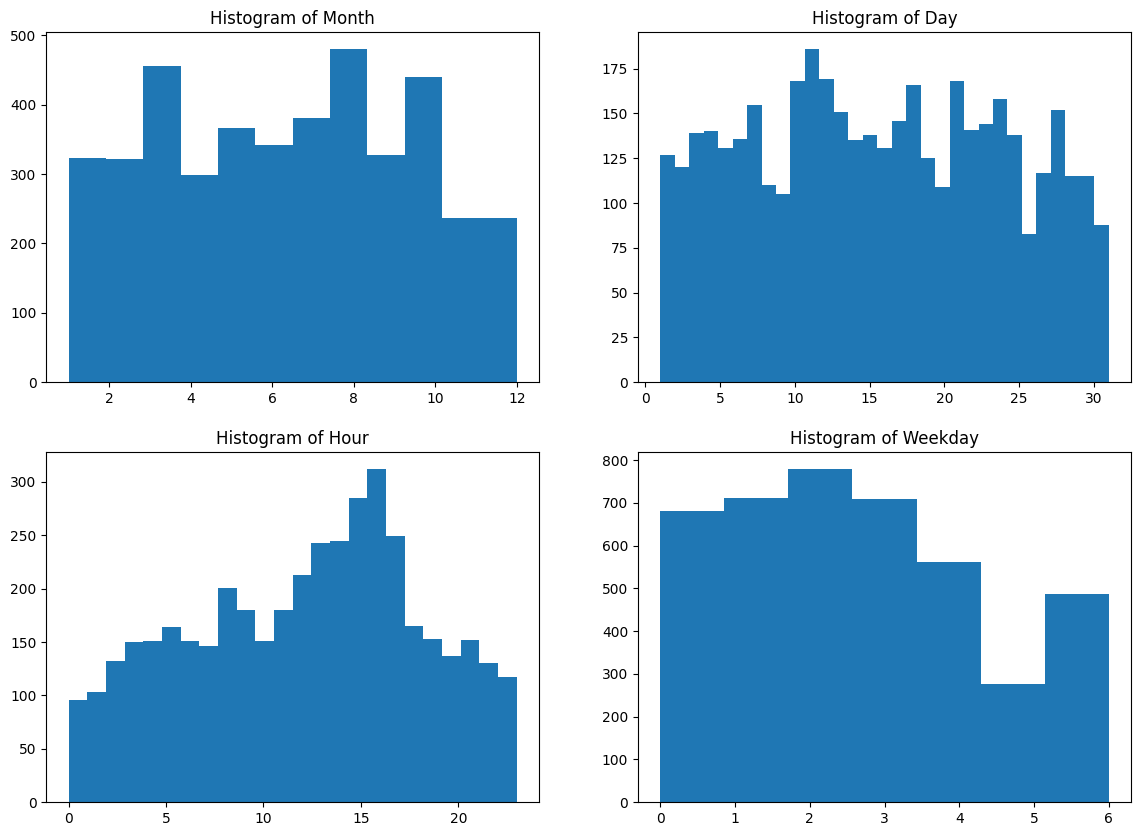

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(14,10))

times = ['Month', 'Day', 'Hour', 'Weekday']
index = 0
bins = [12, 31, 24, 7]

for i in range(2):
    for j in range(2):
        ax[i,j].hist(df[times[index]], bins = bins[index])
        ax[i, j].set_title(f'Histogram of {times[index]}')
        index += 1
        
fig.subplots_adjust(hspace = 0.2) 

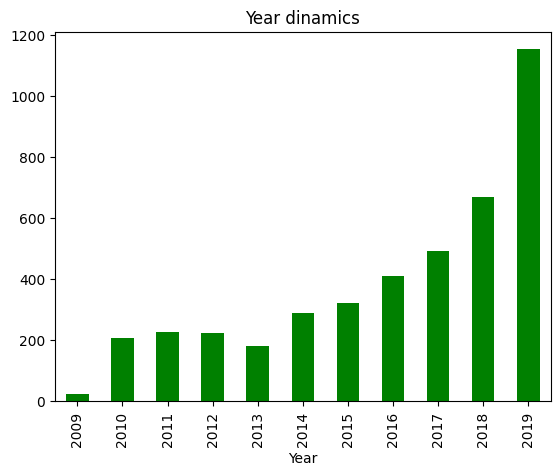

In [42]:
df.Year.value_counts().sort_index().plot(kind='bar', color='green', title='Year dinamics');

In [49]:
df['origin_year'].value_counts()[:10]

origin_year
Unknown    349
2011       329
2016       310
2010       297
2017       281
2013       259
2019       258
2012       236
2014       233
2018       229
Name: count, dtype: int64

In [46]:
df['origin_year'].value_counts()[-10:]

origin_year
1931    1
1848    1
1495    1
1800    1
1907    1
1111    1
1932    1
1928    1
1942    1
1890    1
Name: count, dtype: int64

In [52]:
df.loc[df['origin_year'] == 'Unknown', 'origin_year'] = None
df['origin_year'].isnull().sum()

np.int64(349)

In [53]:
df.loc[~df.origin_year.apply(lambda x: str(x).isdigit()),'origin_year'] = 0

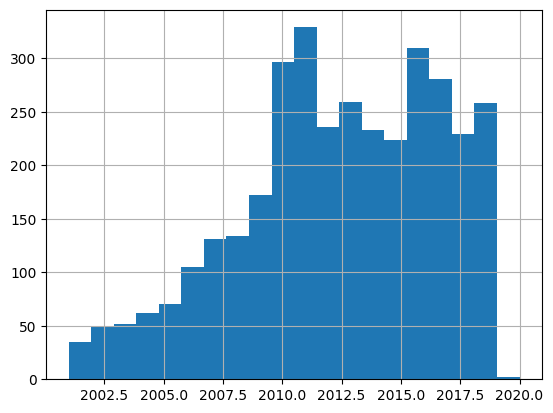

In [55]:
df.origin_year = df.origin_year.astype(int)
df.origin_year[(df.origin_year > 2000)&(df.origin_year <= 2020)].hist(bins=20);

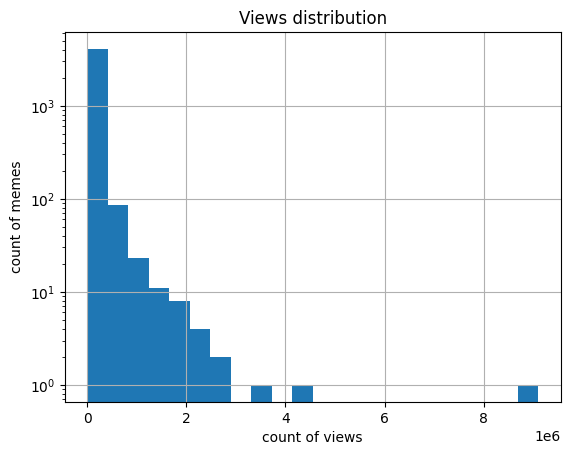

In [61]:
df.views.hist(bins=22, log=True)

plt.xlabel('count of views')
plt.ylabel('count of memes')
plt.title('Views distribution');

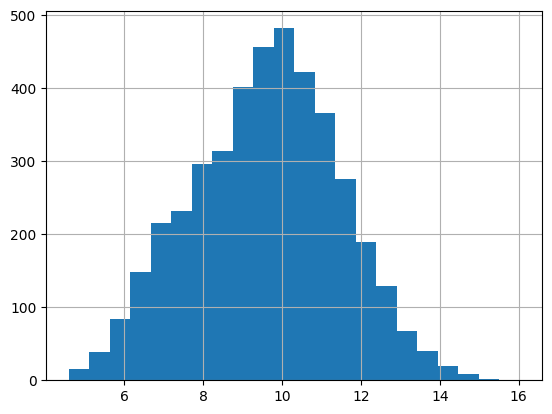

In [63]:
df.views.apply(lambda x: np.log(x+1)).hist(bins=22);

In [70]:
df['average_views'] = df.views / (df['Days_from_creation']+1)
df.average_views.max()

np.float64(331509.73355084285)

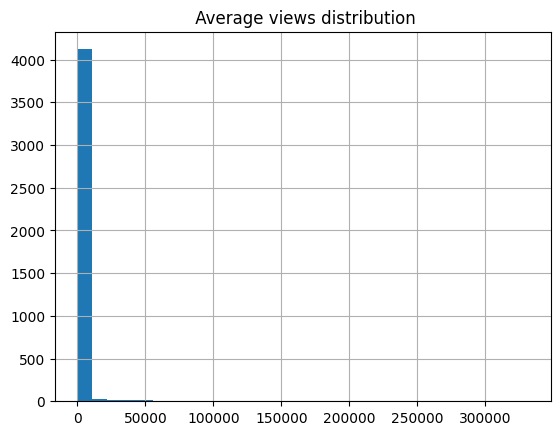

In [74]:
df.average_views.hist(bins=30);
plt.title(' Average views distribution');

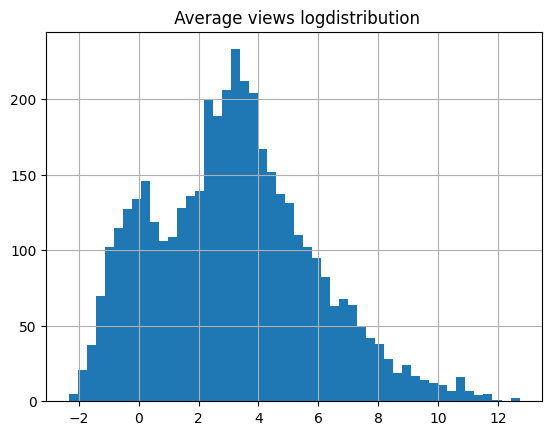

In [77]:
df.average_views.apply(np.log).hist(bins=50);
plt.title(' Average views logdistribution');

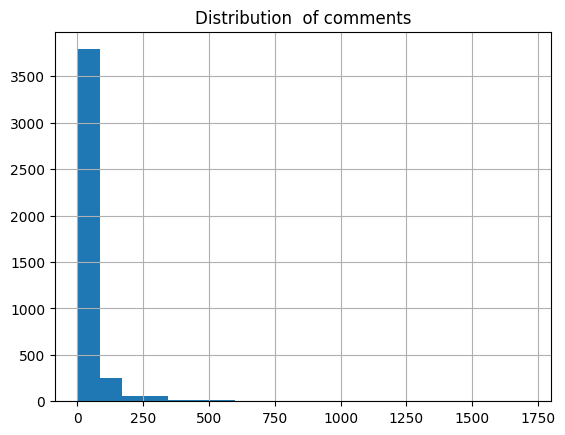

In [83]:
df.comments.hist(bins=20);
plt.title("Distribution  of comments");

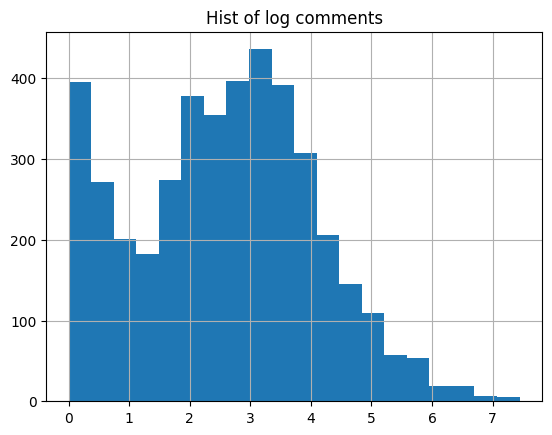

In [ ]:
df.comments.apply(lambda x: np.log(x+1)).hist(bins=20);
plt.title("Distribution of log comments");

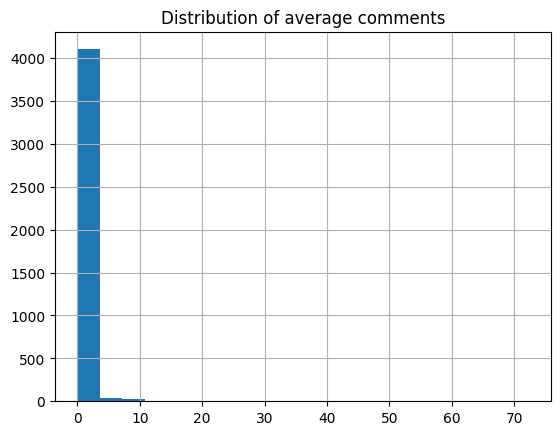

In [87]:
df['average_comments'] = df.comments/(df.Days_from_creation + 1)
df.average_comments.hist(bins=20);
plt.title("Distribution of average comments");

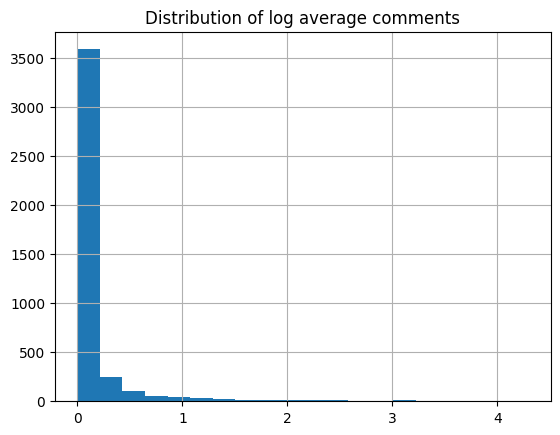

In [100]:
df.average_comments.apply(lambda x: np.log(x+1)).hist(bins=20);
plt.title("Distribution of log average comments");

In [102]:
df.isnull().sum()

name                     0
status                   0
type                  2420
origin_year              0
origin_place             3
date_added               0
views                    0
videos                   0
photos                   0
comments                 0
tags                     1
about                  408
origin                1682
other_text             698
Time                     0
Year                     0
Month                    0
Day                      0
Hour                     0
Weekday                  0
Days_from_creation       0
average_views            0
average_comments         0
dtype: int64

In [104]:
df[['status', 'type', 'origin_place']].describe()

,status,type,origin_place
count,4206,1786,4203
unique,3,98,1884
top,Submission,Exploitable,Unknown
freq,2482,152,535


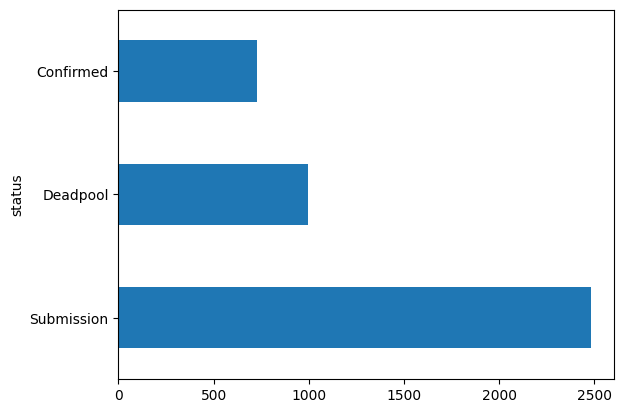

In [108]:
df.status.value_counts().plot(kind='barh');

In [ ]:
pd.get_dummies(df.status, dummy_na=True, prefix="OHE_").head()
# drop_first=True для обхода dummy ловушки

,OHE__Confirmed,OHE__Deadpool,OHE__Submission,OHE__nan
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [117]:
df.type.value_counts()

type
Exploitable    152
Character      121
Catchphrase    112
Image Macro    111
Controversy     95
              ... 
Music            1
Programmer       1
Convention       1
Scientist        1
Flash Mob        1
Name: count, Length: 98, dtype: int64

In [121]:
usefull_category = set(df.type.value_counts()[df.type.value_counts() >= 30].index)
usefull_category

{'Anime',
 'Catchphrase',
 'Character',
 'Controversy',
 'Copypasta',
 'Exploitable',
 'Image Macro',
 'Parody',
 'Participatory Media',
 'Pop Culture Reference',
 'Reaction',
 'Remix',
 'Slang',
 'Song',
 'Video Game',
 'Viral Video'}

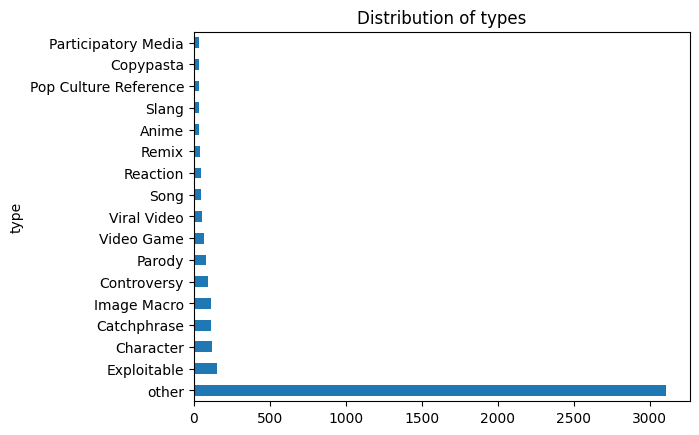

In [133]:
df.type = df.type.apply(lambda x: x if x in usefull_category else 'other')
df.type.value_counts().plot(kind='barh');
plt.title('Distribution of types');

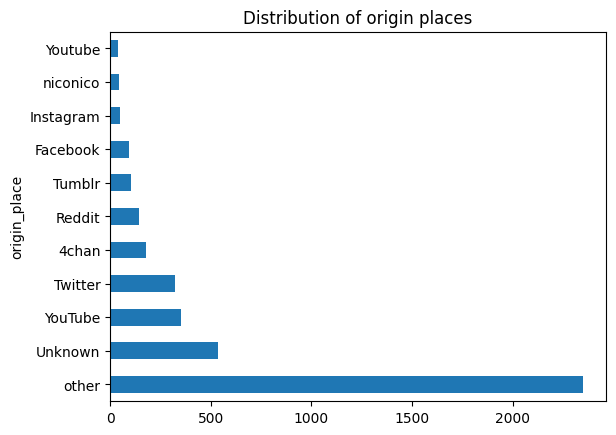

In [134]:
usefull_category = set(df.origin_place.value_counts()[df.origin_place.value_counts() >= 30].index)

df.origin_place = df.origin_place.apply(lambda x: x if x in usefull_category else 'other')
df.origin_place.value_counts().plot(kind='barh');
plt.title('Distribution of origin places');

In [ ]:
df.set_index('name', inplace=True)

In [140]:
df.drop(['tags', 'about', 'origin', 'other_text', 'date_added', 'Time'], axis=1, inplace=True)

In [141]:
df.head()

,status,type,origin_year,origin_place,views,videos,photos,comments,Year,Month,Day,Hour,Weekday,Days_from_creation,average_views,average_comments
name,,,,,,,,,,,,,,,,
Muvvafukka,Submission,Viral Video,2019,Facebook,13613,0,7,8,2019,10,24,4,3,13.478206,940.240799,0.552555
Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,other,13973,0,17,8,2019,10,23,12,2,14.139201,922.968104,0.528429
Wet Kylo Ren,Submission,Image Macro,2019,other,5339,0,12,7,2019,10,23,11,2,14.150937,352.387435,0.462018
You're Invited,Submission,Parody,2019,other,2249,0,0,0,2019,10,23,10,2,14.209444,147.868649,0.000000
Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,5662,0,16,33,2019,10,25,12,4,12.118958,431.589144,2.515444


In [142]:
df.isnull().sum()

status                0
type                  0
origin_year           0
origin_place          0
views                 0
videos                0
photos                0
comments              0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekday               0
Days_from_creation    0
average_views         0
average_comments      0
dtype: int64

In [143]:
df.to_csv('data/memes_prepare.csv')

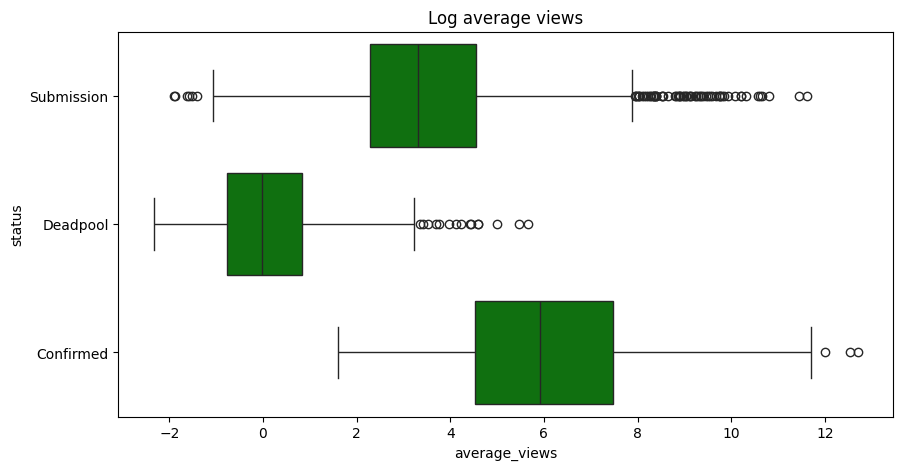

In [159]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = np.log(df.average_views), y = df.status, color = 'green')
plt.title("Log average views");

In [160]:
df['log_average_views'] = df.average_views.apply(np.log)

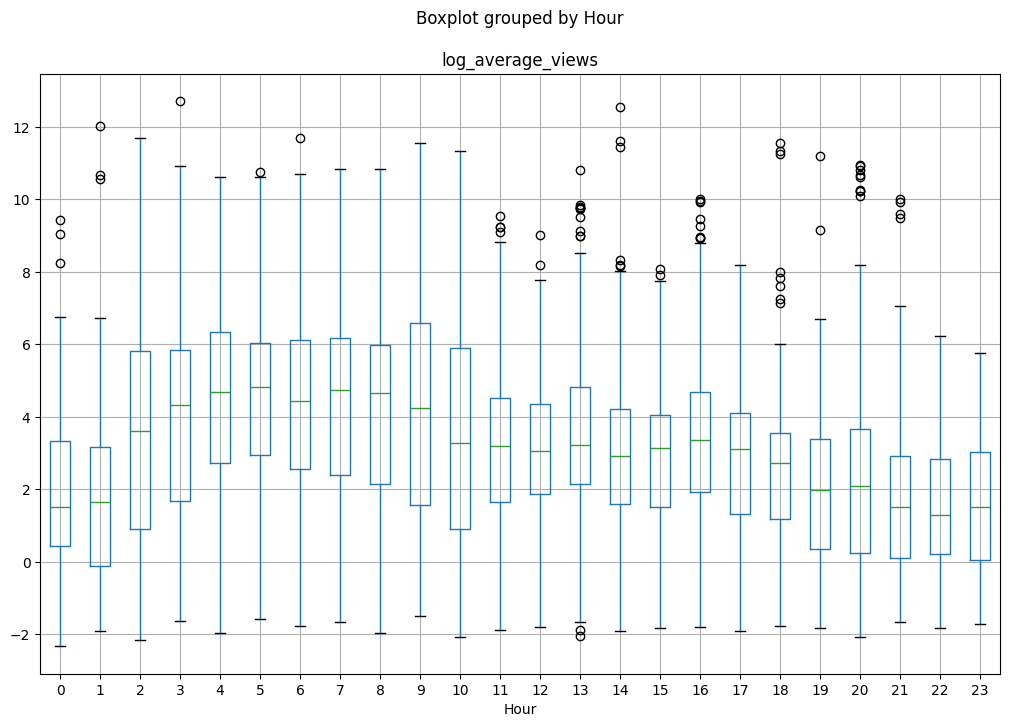

In [162]:
df.boxplot(column='log_average_views', by='Hour', figsize=(12,8));

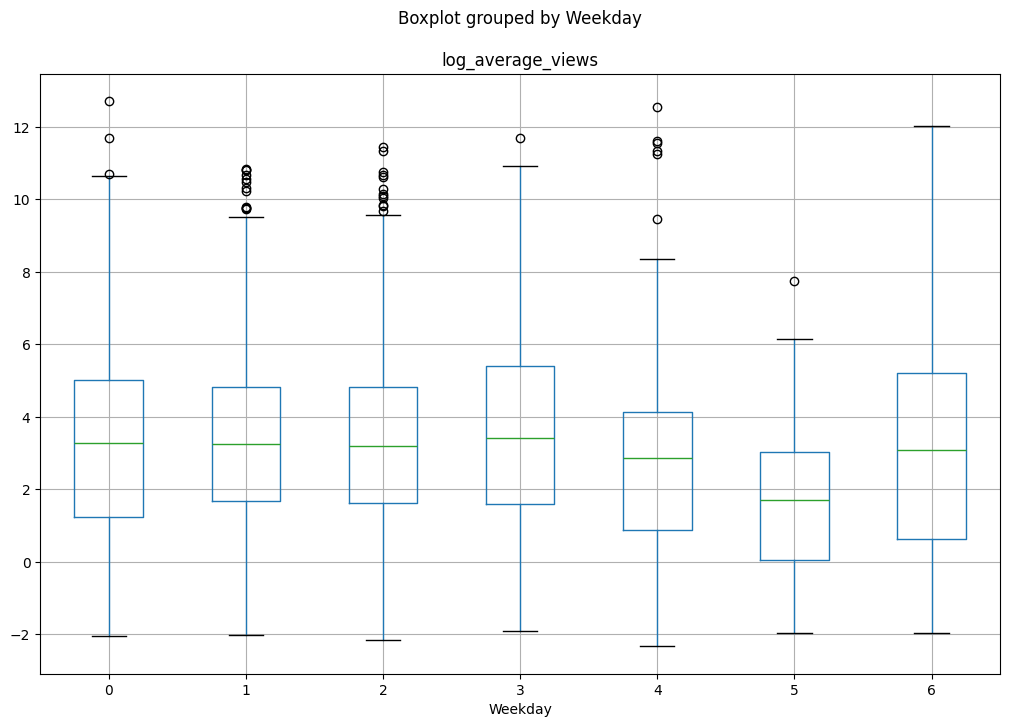

In [164]:
df.boxplot(column='log_average_views', by='Weekday', figsize=(12,8));

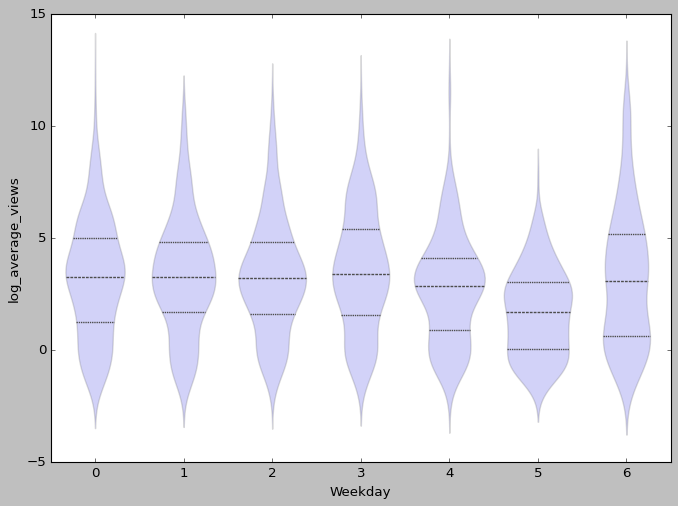

In [172]:
plt.style.use('classic')
plt.figure(figsize=(10, 7))
sns.violinplot(x='Weekday', y='log_average_views', data=df, inner='quartile', alpha=0.2);

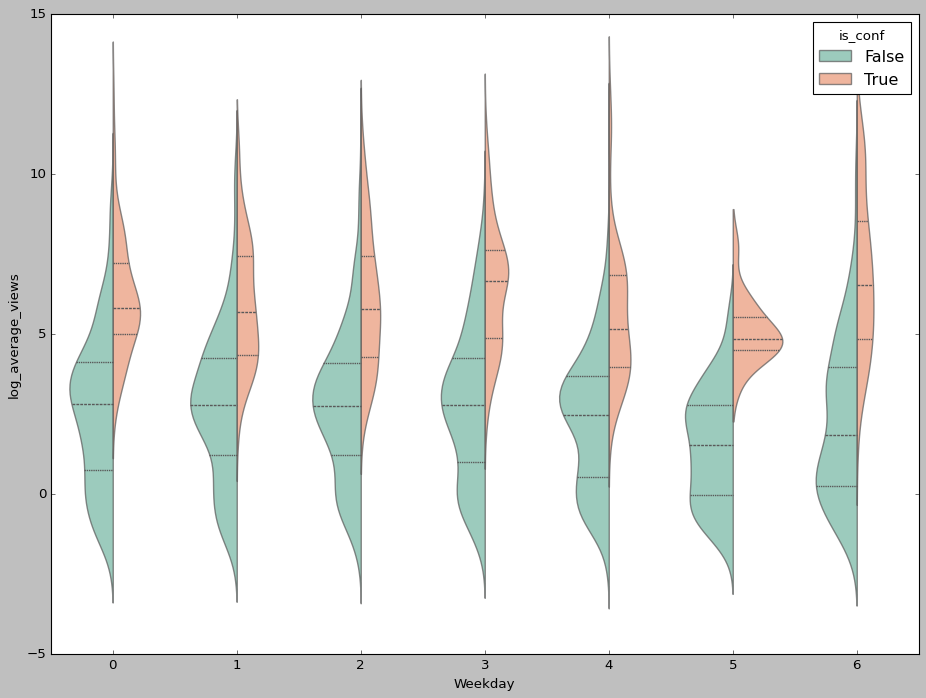

In [186]:
plt.figure(figsize=(14, 10))

df['is_conf'] = df.status == 'Confirmed'

sns.violinplot(x='Weekday', y='log_average_views', data=df, 
               hue = 'is_conf', split=True,
               palette='Set2', inner='quartile', alpha=0.7);

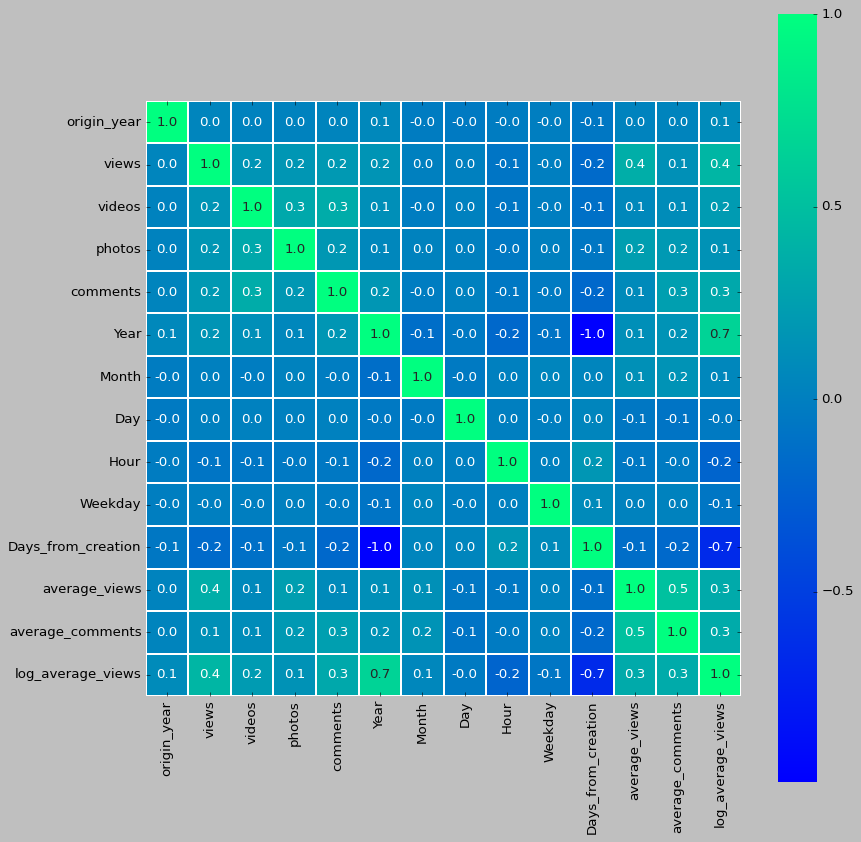

In [187]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.subplots(figsize=(12, 12))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='winter');

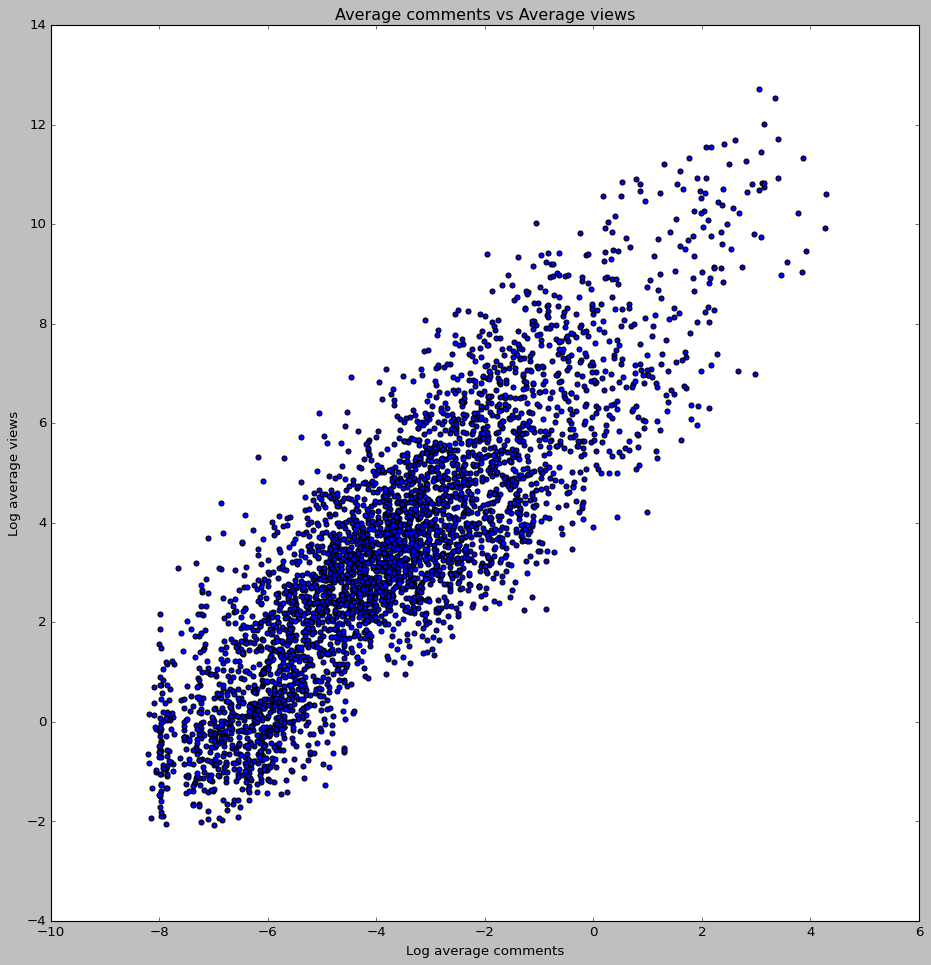

In [189]:
plt.figure(figsize=(14, 14))
plt.scatter(np.log(df.average_comments), np.log(df.average_views))
plt.title("Average comments vs Average views")
plt.ylabel("Log average views")
plt.xlabel("Log average comments")
plt.show()